<h1>Sentiment Analysis on Customer Feedback</h1>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import requests

In [2]:
#change source file path
df = pd.read_csv("C:/Users/toshiba/Desktop/AT&R/LC_src_sent.csv")
df.dtypes

Name                object
Contact             object
Email               object
tn                  object
ot                  object
Branch              object
FOODQUALITY        float64
AMBIANCE           float64
SERVICE            float64
HYGIENE            float64
EXPERIENCE         float64
often               object
recommend           object
todayexperience     object
suggestion          object
mc4wp_checkbox      object
Date                object
dtype: object

In [3]:
#if Order data is not of date type, then change its data type
df['Date'] = df['Date'].astype('datetime64[ns]')

#Creating a new column as review to combine experience and suggestion
df['review'] = df['todayexperience'] + '. ' + df['suggestion']

In [4]:
#Applying sentiment to determine polarity
df['review'] = df['review'].apply(lambda x: str(x))
df['sentiment'] = df['review'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [5]:
#Can be used to extract nouns and adjectives

#Adjectives = [] 
#Nouns = []

#for  i, row in df.iterrows():
    #Adjectives.extend([word for word,pos in TextBlob(df.loc[i,'review']).pos_tags if pos == 'JJ'])

#for  i, row in df.iterrows():
    #Nouns.extend([word for word,pos in TextBlob(df.loc[i,'review']).pos_tags if pos == 'NN'])

#s1 = pd.Series(Adjectives, name='Adjectives')
#s2 = pd.Series(Nouns, name='Noun')
#df2 = pd.concat([s1,s2], axis=1)
#df2.to_csv("C:/Users/toshiba/Desktop/AT&R/LC_words.csv", sep=',',index=False)

In [6]:
#Assigning labels to polarity

for i,row in df.iterrows():
    if df.loc[i,'sentiment'] == 0:
        df.loc[i,'sentiment'] = 'Neutral'
    elif df.loc[i, 'sentiment'] > 0:
        df.loc[i, 'sentiment'] = 'Positive'
    elif df.loc[i, 'sentiment'] < 0:
        df.loc[i, 'sentiment'] = 'Negative'    
        

In [7]:
#preparing data for positive feedback word cloud

comment_words = ' '
stopwords = set(STOPWORDS) 
for i,row in df.iterrows():
    if df.loc[i,'sentiment'] == 'Positive':
        if df.loc[i,'review'] == 'NaN':
            df.loc[i,'review'] = ' '
        else:    
            df.loc[i,'review'] = str(df.loc[i,'review'])
            tokens = df.loc[i,'review'].split() 
      
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
            if tokens[i] == 'no' or tokens[i] == 'nan' or tokens[i] == 'none':
                tokens[i] = ''
        
        
        for words in tokens:
            comment_words = comment_words + words + ' '

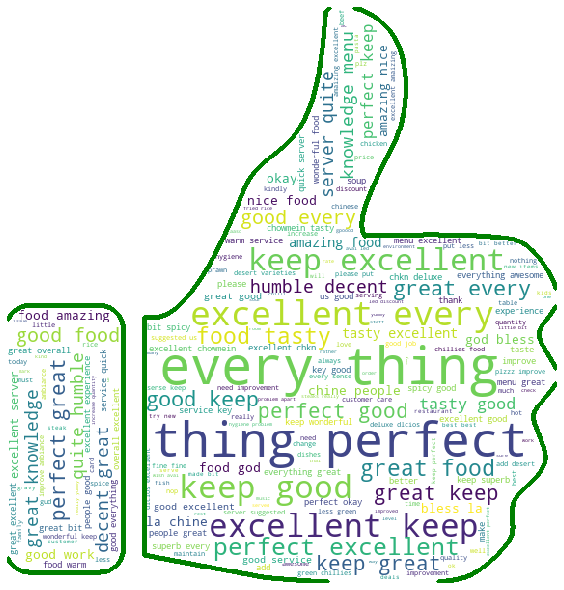

In [8]:
#creating positive feedback wordcloud

wordcloud = WordCloud(width = 900, height = 900, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 4,
                contour_width=5, 
                contour_color='green',
                mask = np.array(Image.open(requests.get('http://clipart-library.com/new_gallery/38-383427_red-thumbs-up-clipart.png', stream=True).raw))).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize=(10,8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#change destination path
wordcloud.to_file("C:/Users/toshiba/Desktop/AT&R/LC_posfeedback.png")

In [9]:
#preparing data for negative feedback word cloud

comment_words = ' '
stopwords = set(STOPWORDS) 
for i,row in df.iterrows():
    if df.loc[i,'sentiment'] == 'Negative':
        if df.loc[i,'review'] == 'NaN':
            df.loc[i,'review'] = ' '
        else:    
            df.loc[i,'review'] = str(df.loc[i,'review'])
            tokens = df.loc[i,'review'].split() 
      
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
            if tokens[i] == 'no' or tokens[i] == 'nan' or tokens[i] == 'none':
                tokens[i] = ''
        
        
        for words in tokens:
            comment_words = comment_words + words + ' '

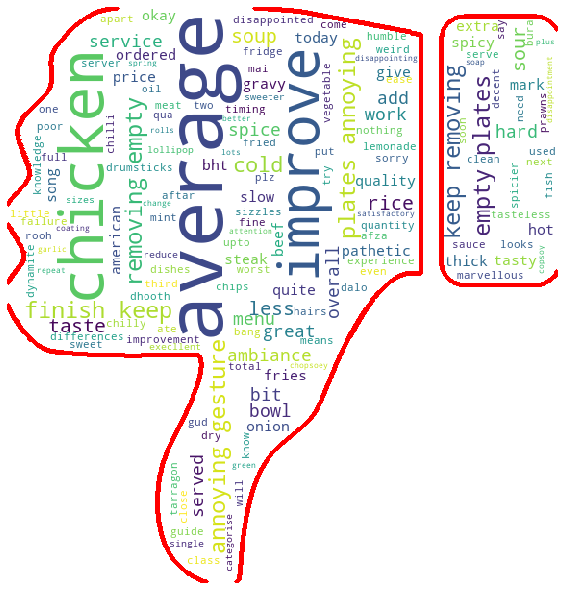

In [10]:
#creating negative feedback wordcloud

stopwords.update(["customer", "let", "time", "thanks", "please", "good", "food", "bad", "plzzz", "nan"])

wordcloud = WordCloud(width = 900, height = 900, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 4,
                contour_width=5, 
                contour_color='red',
                mask = np.array(Image.open(requests.get('http://clipart-library.com/images/gTe5xE6Kc.png', stream=True).raw))).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize=(10,8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

#change destination path
wordcloud.to_file("C:/Users/toshiba/Desktop/AT&R/LC_negfeedback.png")

In [12]:
#change destination path
df.to_csv("C:/Users/toshiba/Desktop/AT&R/LC_dest_sent.csv")